In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [5]:
url_1 = 'https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Flyer_Customer_Satisfaction/main/Data/airplane_train_processed.csv'
df = pd.read_csv(url_1)

In [6]:
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

In [7]:
df

,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Age,Flight Distance,satisfaction
0,25.0,18.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,13,460,0
1,1.0,6.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,25,235,0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,26,1142,1
3,11.0,9.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,25,562,0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,61,214,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102820,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,3.0,1.0,4.0,2.0,3.0,2.0,23,192,0
102821,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,49,2347,1
102822,7.0,14.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,3.0,2.0,4.0,5.0,5.0,4.0,30,1995,0
102823,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,4.0,5.0,1.0,5.0,4.0,1.0,22,1000,0


In [8]:
X = df[['Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'Age',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']]
y = df['satisfaction'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [11]:
url_2 = 'https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Flyer_Customer_Satisfaction/main/Data/airplane_test_processed.csv'
df_val = pd.read_csv(url_2)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [12]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 21,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
!pip install shap

In [14]:
# define a function that takes in input data and returns predicted probabilities of the positive class
def predict_probability(X):
    # predict the output probabilities using the logistic regression model
    y_proba = xgb_clf.predict_proba(X)
    return y_proba[:, 1]  # return the probability of the positive class (y=1)

In [15]:
import shap
# create an explainer object using the SHAP library and the predict_probability function
explainer = shap.Explainer(xgb_clf, X)

# compute SHAP values for the input data using the explainer object
shap_values = explainer(X)
shap.initjs()

# plot the SHAP values using the force plot
shap.plots.force(shap_values[0])


100%|===================| 102778/102825 [20:58<00:00]       

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


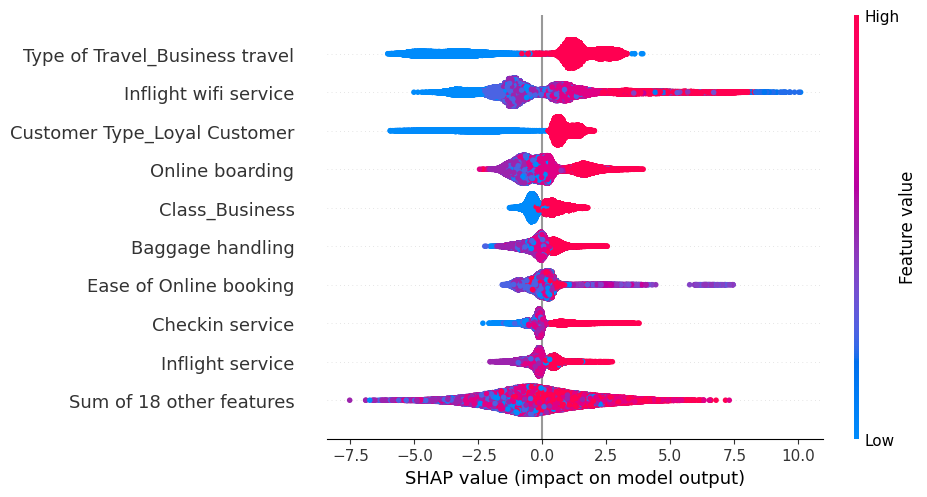

In [25]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)



*   Business Class travel increases the  probability of a customer being satisfied
*   For loyal customers the probability of  the cstomer being satisfied is higher
*   For Online Boarding, Business class,high values for baggage handling  and Checkin service the probability of a customer being satisfied is higher.
* For higher values of inflight service  the probability of a customer being satisfied is higher.


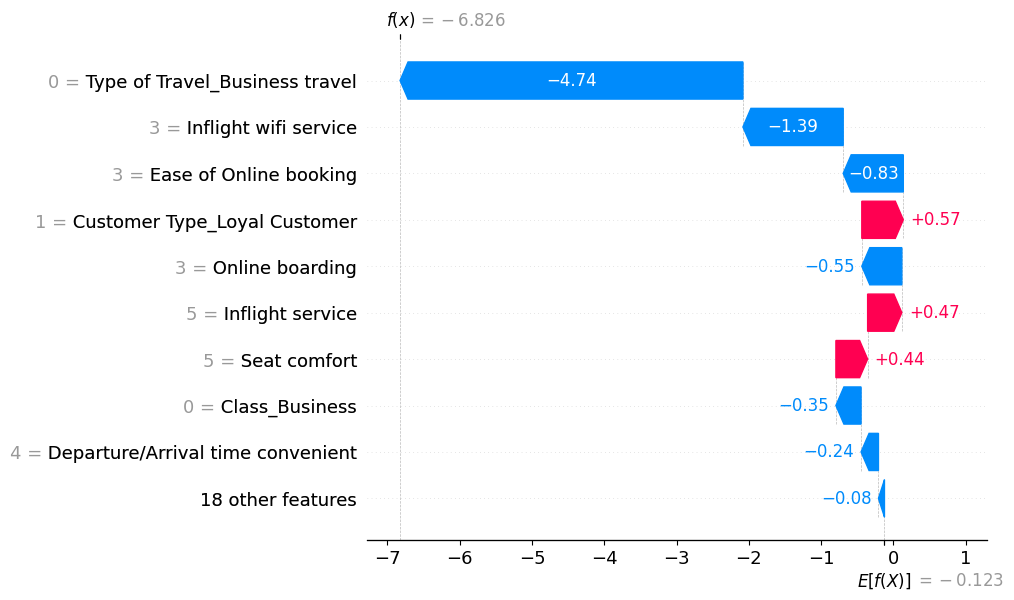

In [26]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

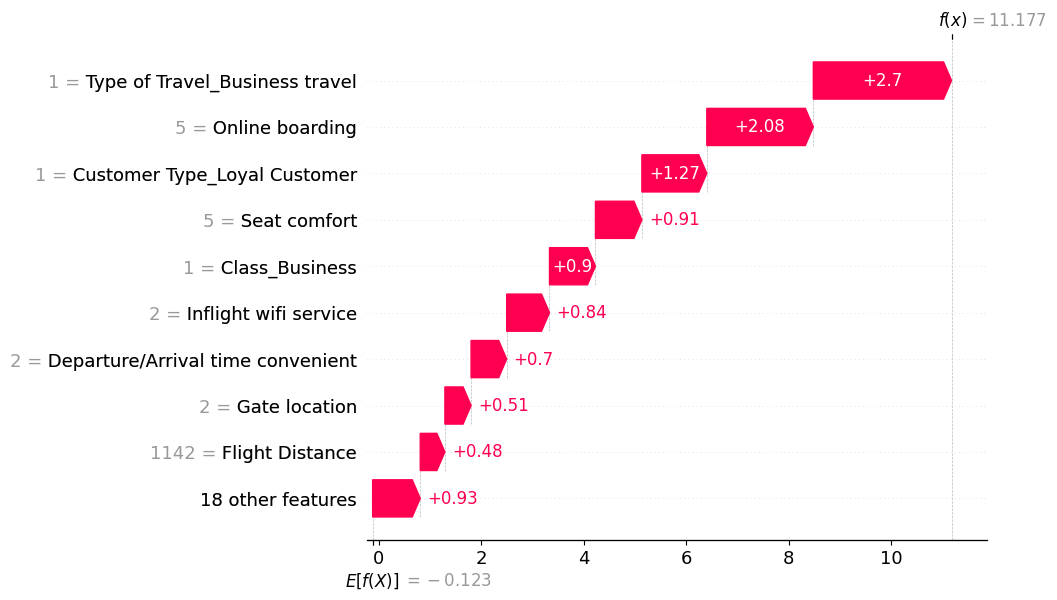

In [27]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[2])

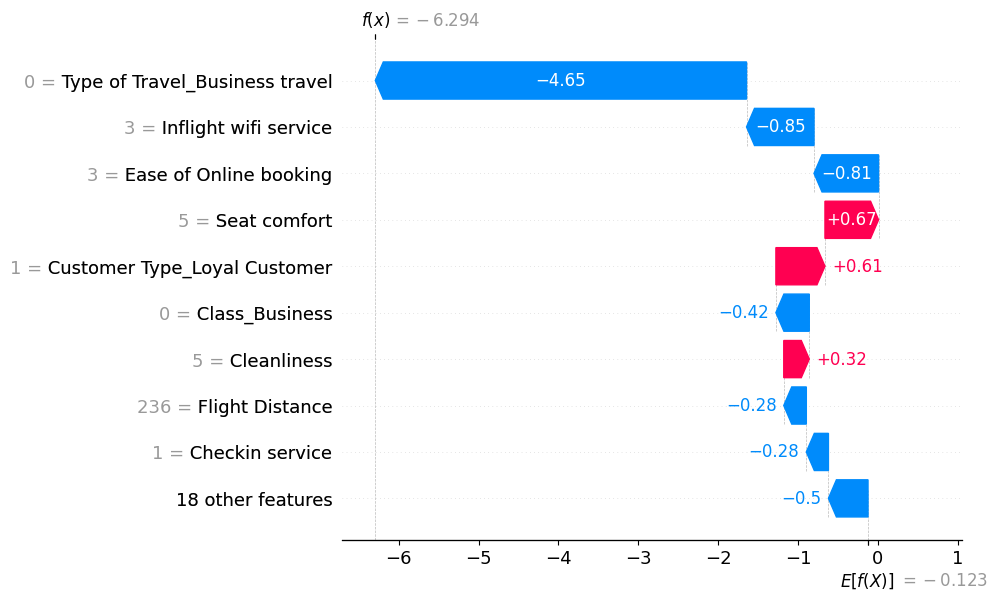

In [28]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[422])

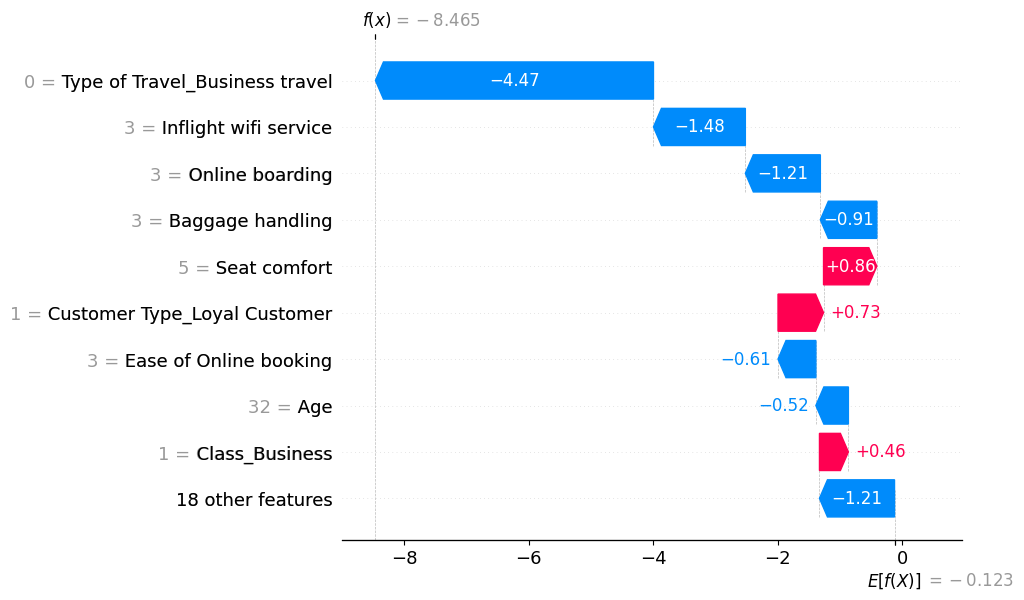

In [29]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[722])

In [19]:
result3=[]

for i in range(len(X)):
    # Get the SHAP values for the current instance
    shap_values_inst = shap_values[i]
    # Get the absolute values of the SHAP values
    abs_shap_values_inst = np.abs(shap_values_inst.values)

    # Get the indices of the top 3 contributors
    top_contributors_indices = abs_shap_values_inst.argsort()[-3:][::-1]

    # Get the names of the top 3 contributor features
    top_contributors_names = X.columns[top_contributors_indices]

    # Get the SHAP values for the top 3 contributors
    top_contributors_shaps = shap_values_inst.values[top_contributors_indices]
    
    # Get the probability of the positive class for the current instance
    positive_prob = predict_probability(X.iloc[[i]])[0]
    
    # Add the results for the current instance to the list, including the probability of the positive class
    result3.append({
        'top_1_contributor_feature': top_contributors_names[0],
        'top_1_contributor_shap': top_contributors_shaps[0],
        'top_2_contributor_feature': top_contributors_names[1],
        'top_2_contributor_shap': top_contributors_shaps[1],
        'top_3_contributor_feature': top_contributors_names[2],
        'top_3_contributor_shap': top_contributors_shaps[2],
        'positive_prob': positive_prob
    })

In [20]:
results_df = pd.DataFrame(result3)
results_df = results_df.rename_axis(df.index.name).reset_index()

In [21]:
results_df

,index,top_1_contributor_feature,top_1_contributor_shap,top_2_contributor_feature,top_2_contributor_shap,top_3_contributor_feature,top_3_contributor_shap,positive_prob
0,0,Type of Travel_Business travel,-4.744479,Inflight wifi service,-1.387503,Ease of Online booking,-0.831760,0.001084
1,1,Customer Type_Loyal Customer,-2.460447,Online boarding,-1.111698,Inflight wifi service,-1.091692,0.000355
2,2,Type of Travel_Business travel,2.698023,Online boarding,2.079270,Customer Type_Loyal Customer,1.267148,0.999986
3,3,Baggage handling,-1.302421,Inflight wifi service,-1.154692,Type of Travel_Business travel,1.048599,0.001055
4,4,Type of Travel_Business travel,2.785177,Online boarding,2.433879,Customer Type_Loyal Customer,1.214948,0.999503
...,...,...,...,...,...,...,...,...
102820,102820,Customer Type_Loyal Customer,-2.177772,Inflight wifi service,-1.311364,Type of Travel_Business travel,0.859152,0.000695
102821,102821,Type of Travel_Business travel,2.181080,Customer Type_Loyal Customer,1.300004,Inflight wifi service,0.927902,0.999751
102822,102822,Customer Type_Loyal Customer,-4.531700,Inflight wifi service,-2.420391,Type of Travel_Business travel,1.335766,0.003864
102823,102823,Customer Type_Loyal Customer,-2.583483,Inflight wifi service,-2.459167,Checkin service,1.473813,0.041220


In [22]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [23]:
results_df.to_csv('/content/drive/MyDrive/Enterprise Data Science Group Project/shap.csv', index=False)


<h2> Interpreting the models for individual data points</h2>

Input a number: 0


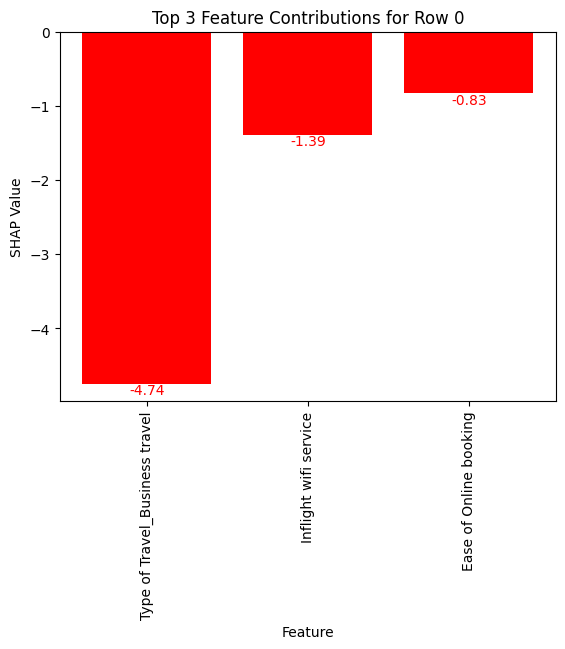

In [30]:
# input the row number
number = int(input("Input a number: "))

# select the row where index = number
row = results_df.loc[number]

# create a list of feature names and shap values
features = [row["top_1_contributor_feature"], row["top_2_contributor_feature"], row["top_3_contributor_feature"]]
shaps = [row["top_1_contributor_shap"], row["top_2_contributor_shap"], row["top_3_contributor_shap"]]

# create a bar chart with feature names and shap values
fig, ax = plt.subplots()
bars = ax.bar(features, shaps, color=['red' if s < 0 else 'blue' for s in shaps])
plt.xticks(rotation=90)
plt.title("Top 3 Feature Contributions for Row {}".format(number))
plt.xlabel("Feature")
plt.ylabel("SHAP Value")

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    if height >= 0:
        ax.text(bar.get_x() + bar.get_width()/2., height, '{:.2f}'.format(height), ha='center', va='bottom')
    else:
        ax.text(bar.get_x() + bar.get_width()/2., height, '{:.2f}'.format(height), ha='center', va='top', color='red')

plt.show()

<h1> Using Lime for model explainability</h1>




In [ ]:
pip install lime

In [32]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, discretize_continuous=True)

In [33]:
predict_fn = lambda x: xgb_clf.predict_proba(x).astype(float)

In [34]:
observation = X_test.iloc[0]

In [35]:
exp = explainer.explain_instance(observation.values, predict_fn, num_features=10)

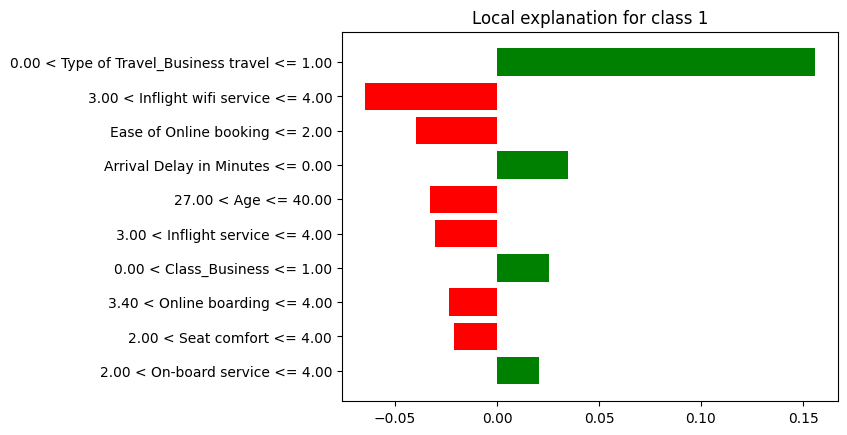

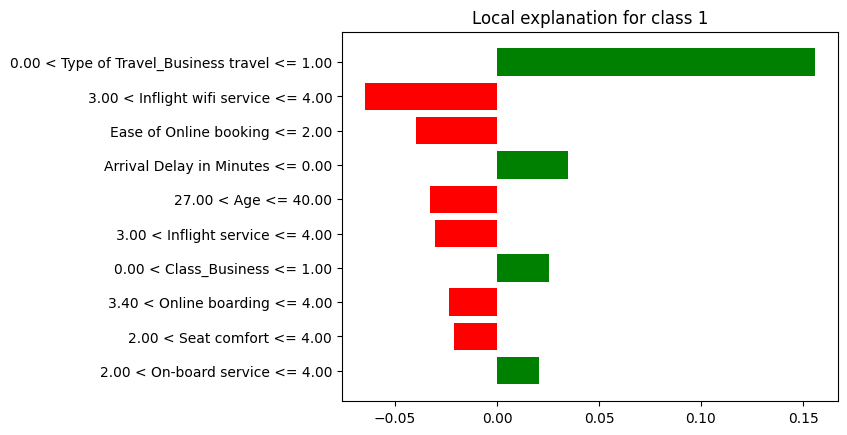

In [36]:
exp.as_pyplot_figure()

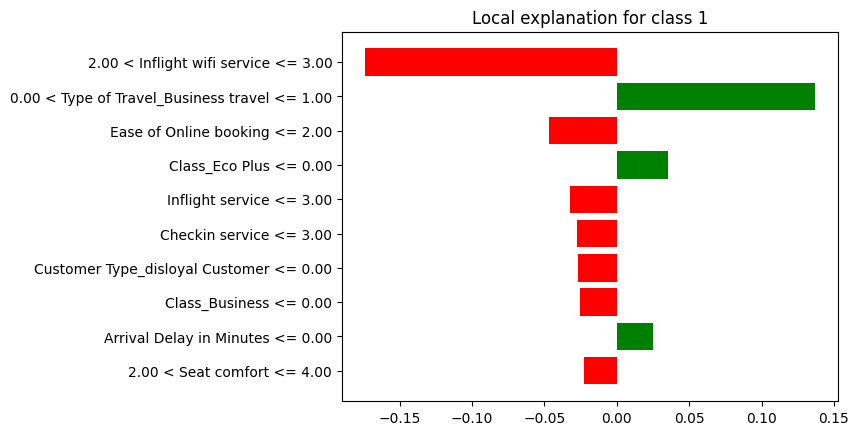

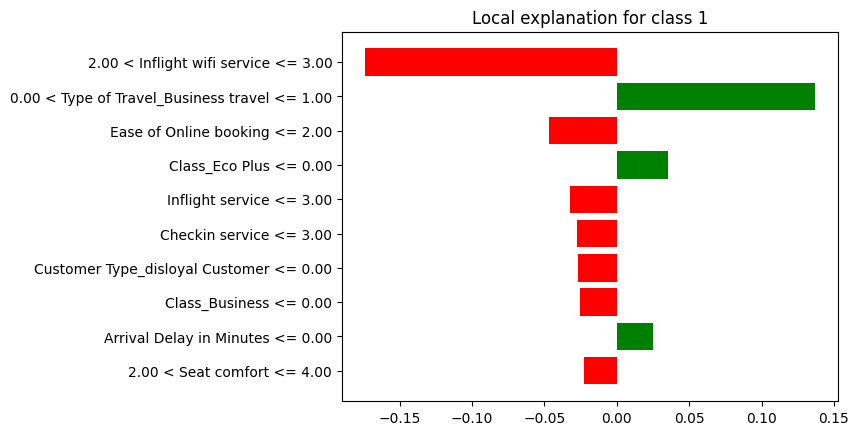

In [37]:
observation = X_test.iloc[2]
exp = explainer.explain_instance(observation.values, predict_fn, num_features=10)
exp.as_pyplot_figure()